This is the code for Linear mixed model analysis in R

In [1]:
#load the packages for analysis
library(lmerTest)
require(readxl)

library(readxl)

#library(MuMIn)

Loading required package: lme4
Loading required package: Matrix
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'lmerTest'

The following object is masked from 'package:lme4':

    lmer

The following object is masked from 'package:stats':

    step

Loading required package: readxl


In [2]:
# This prevents scientific notation for p values unless they are very small.
options(scipen=0)


In [78]:
#paphway for the directory with our file
my_directory <- file.path("D:/My dissertation/Running_sedentary_project/output_file_F_modified.xlsx")

In [6]:
setwd("D:/My dissertation/obesity/obesity_project")

In [26]:
#read the file with the data
input_data <- readxl::read_excel("D:/My dissertation/Running_sedentary_project/output_file_L_modified.xlsx")

In [27]:
#identification of factors paramters
input_data$Factor <- factor(input_data$Factor)
#input_data$Type <- factor(input_data$Type)
input_data$Animal_id <- factor(input_data$Animal)
input_data$Cell_id <- factor(input_data$Cell)

In [28]:
#names of the columns
colnames(input_data)

[1] "Factor"    "Animal"    "Cell"      "Transient" "Baseline"  "Amplitude"
 [7] "t0"        "delta t0"  "Delay"     "r_10"      "r_20"      "r_50"     
[13] "r_80"      "r_90"      "TTP"       "d_10"      "d_20"      "d_50"     
[19] "d_80"      "d_90"      "t_2080"    "t_1090"    "FDHM"      "t_8020"   
[25] "t_9010"    "dLL"       "Animal_id" "Cell_id"

In [46]:
model <- lmer(parameter ~ Factor + (1|Animal_id/Cell_id), data = input_data)
summary(model, ddf = "Kenward-Roger")

Linear mixed model fit by REML. t-tests use Kenward-Roger's method [
lmerModLmerTest]
Formula: t_9010 ~ Factor + (1 | Animal_id/Cell_id)
   Data: input_data

REML criterion at convergence: 13829.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0596 -0.2860 -0.0241  0.2275 14.9250 

Random effects:
 Groups            Name        Variance Std.Dev.
 Cell_id:Animal_id (Intercept) 1830.0   42.78   
 Animal_id         (Intercept)  108.2   10.40   
 Residual                       472.8   21.74   
Number of obs: 1477, groups:  Cell_id:Animal_id, 149; Animal_id, 24

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  149.000      6.401  16.005  23.278 9.05e-14 ***
Factor1       -0.467      8.677  17.041  -0.054    0.958    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
        (Intr)
Factor1 -0.741

In [75]:
fixed_effects <- summary(model)$coefficients write.csv(fixed_effects, "fixed_effects.csv")

random_effects <- ranef(model)write.csv(random_effects$Animal_id, "random_effects_Animal_id.csv")

random_effects <- ranef(model)write.csv(random_effects$Animal_id, "random_effects_Animal_id_Cell_id.csv")

residuals_vals <- residuals(model) write.csv(residuals_vals, "residuals.csv")

cor_mat <- getME(model, "beta")write.csv(cor_mat, "correlation_matrix.csv")

fitted_vals <- fitted(model)write.csv(fitted_vals,"fitted_values.csv" )

ERROR: Error in parse(text = x, srcfile = src): <text>:1:46: unexpected symbol
1: fixed_effects <- summary(model)$coefficients write.csv
                                                 ^


In [10]:
model <- lmer(parameter ~ Factor + (1|Animal_id/Cell_id), data = input_data)
summary(model)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: r_20 ~ Factor + (1 | Animal_id/Cell_id)
   Data: input_data

REML criterion at convergence: 5399.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2539 -0.6363 -0.0794  0.5793  5.0276 

Random effects:
 Groups            Name        Variance Std.Dev.
 Cell_id:Animal_id (Intercept) 3.1152   1.7650  
 Animal_id         (Intercept) 0.2104   0.4587  
 Residual                      1.6163   1.2713  
Number of obs: 1490, groups:  Cell_id:Animal_id, 149; Animal_id, 24

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   5.8717     0.2706 17.2511  21.695 5.81e-14 ***
Factor1      -0.7615     0.3652 18.3901  -2.085   0.0513 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
        (Intr)
Factor1 -0.741

In [44]:
model <- lmer(parameter ~ Type * Factor + (1|Animal_id/Cell_id), data = input_data)
summary(model, ddf = "Kenward-Roger")

Linear mixed model fit by REML. t-tests use Kenward-Roger's method [
lmerModLmerTest]
Formula: t_8020 ~ Type * Factor + (1 | Animal_id/Cell_id)
   Data: input_data

REML criterion at convergence: 17565.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4213 -0.5632 -0.0061  0.5387  5.7016 

Random effects:
 Groups            Name        Variance Std.Dev.
 Cell_id:Animal_id (Intercept) 1102.85  33.209  
 Animal_id         (Intercept)  438.62  20.943  
 Residual                        35.39   5.949  
Number of obs: 2516, groups:  Cell_id:Animal_id, 252; Animal_id, 20

Fixed effects:
              Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)   209.0696    10.2864  15.3413  20.325 1.65e-12 ***
Type1         -14.2068    14.0718  15.9956  -1.010    0.328    
Factor1        -8.0429    14.5513  15.4585  -0.553    0.588    
Type1:Factor1  -0.4512    20.9013  15.7675  -0.022    0.983    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlati

fixed_effects <- summary(model)$coefficients
write.csv(fixed_effects, "fixed_effects.csv")

random_effects <- ranef(model)
write.csv(random_effects$Animal_id, "random_effects_Animal_id.csv")

random_effects <- ranef(model)
write.csv(random_effects$Animal_id, "random_effects_Animal_id_Cell_id.csv")

residuals_vals <- residuals(model)
write.csv(residuals_vals, "residuals.csv")

cor_mat <- getME(model, "beta")
write.csv(cor_mat, "correlation_matrix.csv")

fitted_vals <- fitted(model)
write.csv(fitted_vals,"fitted_values.csv" )




# colnames(input_data)

Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Set1 is 9
Returning the palette you asked for with that many colors
"
Warning message:
"Removed 1486 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1486 rows containing missing values (`geom_line()`)."


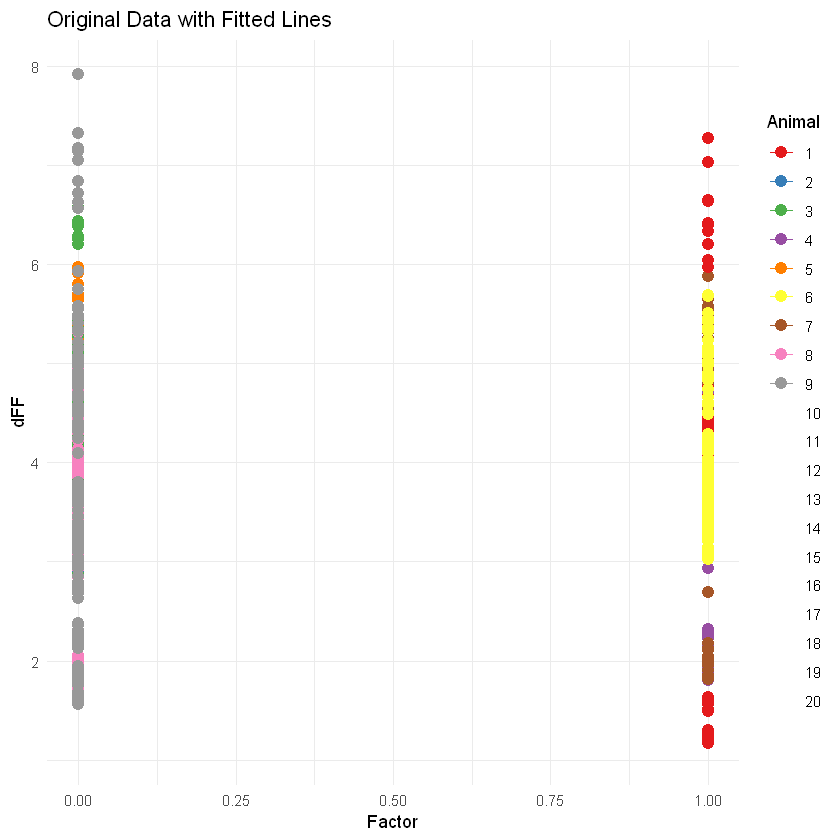

In [28]:
# Load required libraries
# library(lme4) # for lmer, if you haven't already loaded it
library(ggplot2)
library(readxl)
library(RColorBrewer) # for the scale_color_brewer()

# Read in the data
input_data <- readxl::read_excel("D:/My dissertation/obesity/obesity_project/output_file_F_modified.xlsx")
input_data$Animal <- as.factor(input_data$Animal)

# Add the fitted values to your dataset (assuming you've already fitted the model)
input_data$fitted_vals <- fitted(model)

# Plot
p <- ggplot(input_data, aes(x = Type, y = dFF, color = Animal)) + 
  geom_point(aes(y = dFF), size = 3) +  # Original data points
  geom_line(aes(y = fitted_vals, group = Animal)) + # Fitted values as lines and group by Animal to draw separate lines
  labs(title = "Original Data with Fitted Lines", 
        x = "Factor", y = "dFF") +
  theme_minimal() + 
  scale_color_brewer(palette="Set1") # Use a color palette that can handle multiple categories. Adjust as needed.

print(p)


In [37]:
#Linear mixed model fit by REML results
summary(model)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: t_2080 ~ Type + Factor + (1 | Animal_id)
   Data: input_data

REML criterion at convergence: 13413.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2706 -0.6827 -0.1625  0.5313  6.9746 

Random effects:
 Groups    Name        Variance Std.Dev.
 Animal_id (Intercept) 0.977    0.9884  
 Residual              8.645    2.9402  
Number of obs: 2675, groups:  Animal_id, 20

Fixed effects:
            Estimate Std. Error      df t value           Pr(>|t|)    
(Intercept)  10.4302     0.3970 16.5587  26.275 0.0000000000000062 ***
Type1        -0.3121     0.4600 16.6841  -0.678              0.507    
Factor1       0.4540     0.4621 16.6548   0.982              0.340    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
        (Intr) Type1 
Type1   -0.627       
Factor1 -0.582  0.096

In [70]:
#ANOVA 
modelaov <- aov(dFF ~ Factor, data=input_data)

In [71]:
#ANOVA results
summary(modelaov)

              Df Sum Sq Mean Sq F value Pr(>F)
Factor         1      0  0.3476   0.239  0.625
Residuals   2534   3692  1.4569               

In [124]:
# Fit a NON-Hierarchical model (equivalent to a t-test)
NON_hierarchical_model <- glm(FDHM ~ Factor, data=input_data)

In [125]:
#results
summary(NON_hierarchical_model)


Call:
glm(formula = FDHM ~ Factor, data = input_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-77.800  -20.143    0.116   19.793   61.025  

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept) 200.7659     0.5551 361.659 <0.0000000000000002 ***
Factor1       6.3622     0.7291   8.726 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 671.4892)

    Null deviance: 3531463  on 5184  degrees of freedom
Residual deviance: 3480329  on 5183  degrees of freedom
AIC: 48470

Number of Fisher Scoring iterations: 2


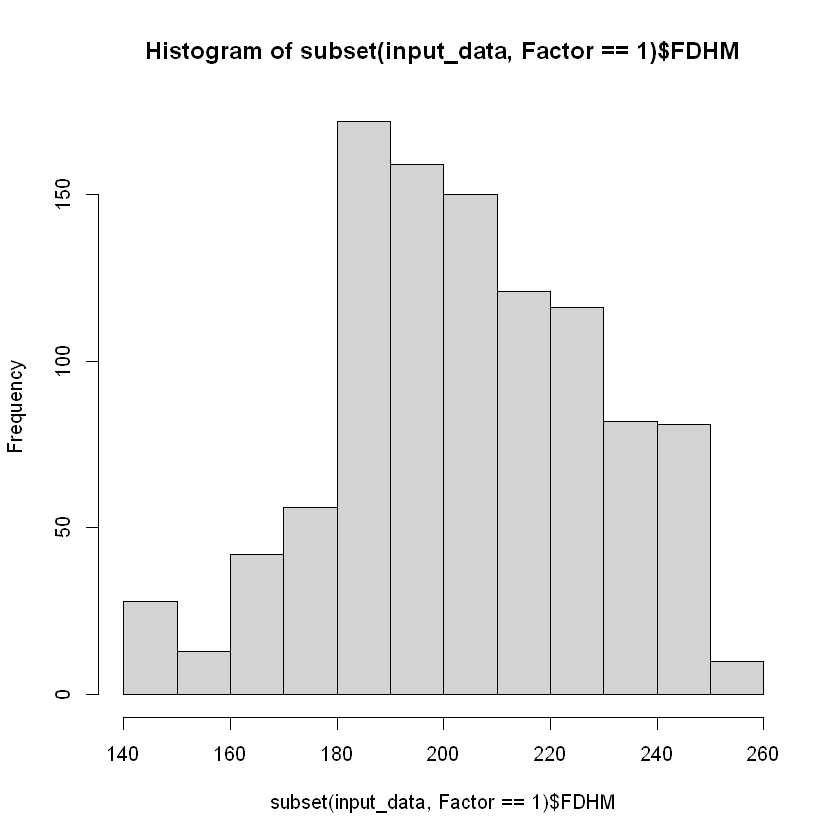

In [32]:
#histogram of parameters in running data
hist(subset(input_data, Factor == 1)$FDHM)

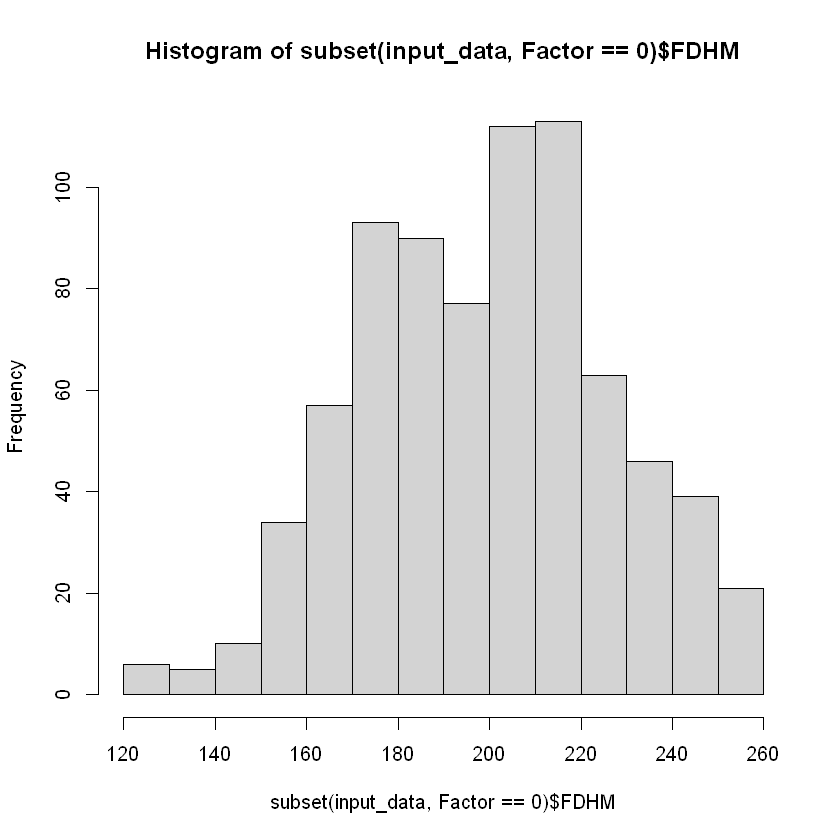

In [33]:
#histogram of parameters in sedentary
hist(subset(input_data, Factor == 0)$FDHM)

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
i Please use `after_stat(density)` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


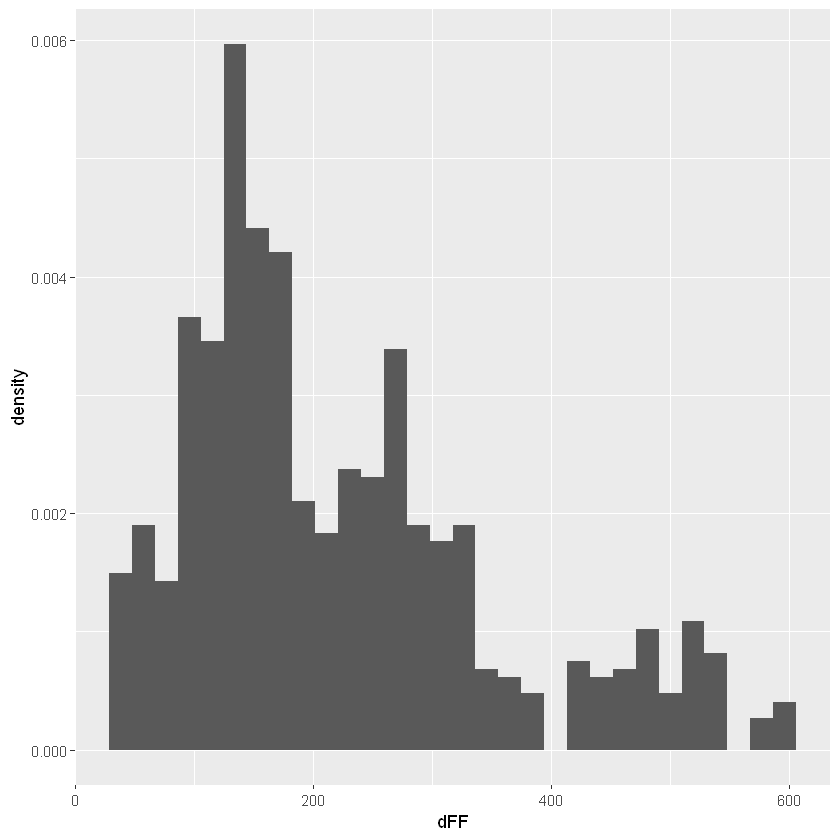

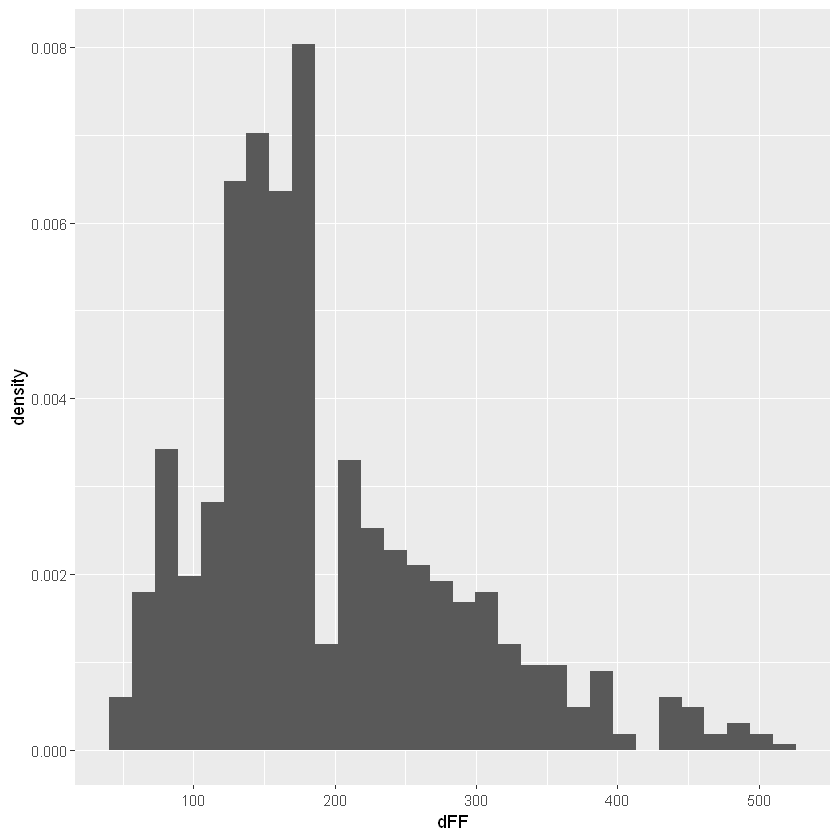

In [34]:

library(ggplot2)
filtered_data <- subset(input_data, Factor == 0)
filtered_data2 <- subset(input_data, Factor == 1)

ggplot(filtered_data, aes(x = dFF,y = ..density..)) +
  geom_histogram()
ggplot(filtered_data2, aes(x = dFF,y = ..density..)) +
  geom_histogram()


In [128]:
#mean value of parameters
mean(filtered_data$FDHM)

[1] 200.7659

In [129]:
mean(filtered_data2$FDHM)

[1] 207.1281

In [84]:
# Subset the data
sedentary <- subset(input_data, Type == 0)
running <- subset(input_data, Type == 1)
res <- kruskal.test(dFF ~ Factor, data = input_data)
print(res)


	Kruskal-Wallis rank sum test

data:  dFF by Factor
Kruskal-Wallis chi-squared = 1.9628, df = 1, p-value = 0.1612



ERROR: Error in model.frame.default(data = data, formula = FDHM ~ Factor): 'data' must be a data.frame, environment, or list


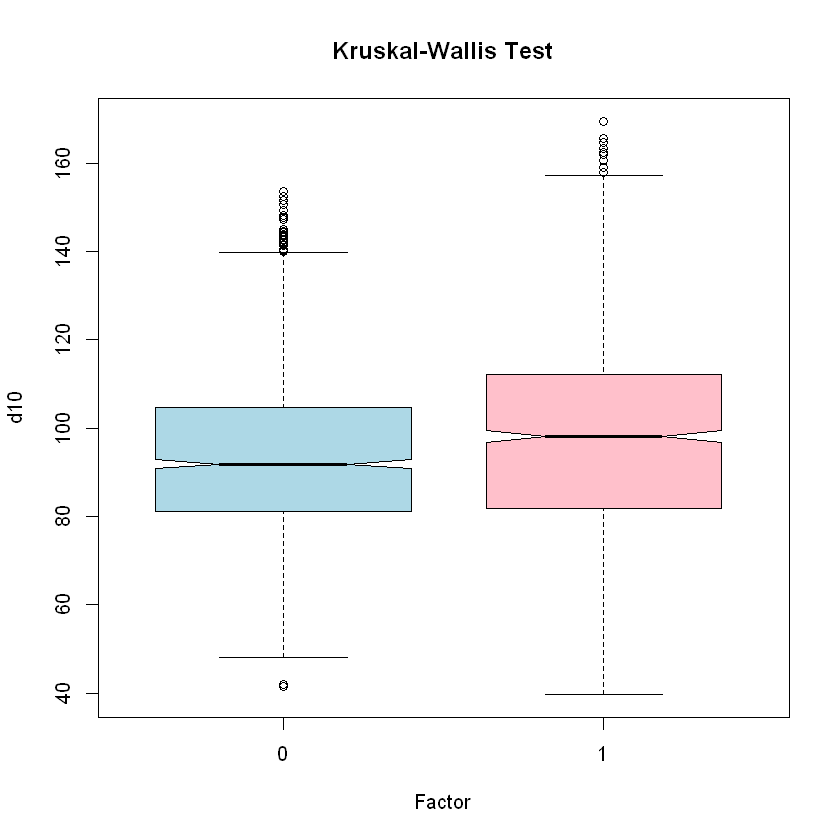

In [82]:
boxplot(d_10 ~ Factor, data = input_data, main = "Kruskal-Wallis Test",
        xlab = "Factor", ylab = "d10", notch = TRUE, varwidth = TRUE, col = c("lightblue","pink"))
stripchart(FDHM ~ Factor, data = data, vertical = TRUE, method = "jitter", 
           pch = 20, add = TRUE, col = 'black')